In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv("winequalityN.csv")
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


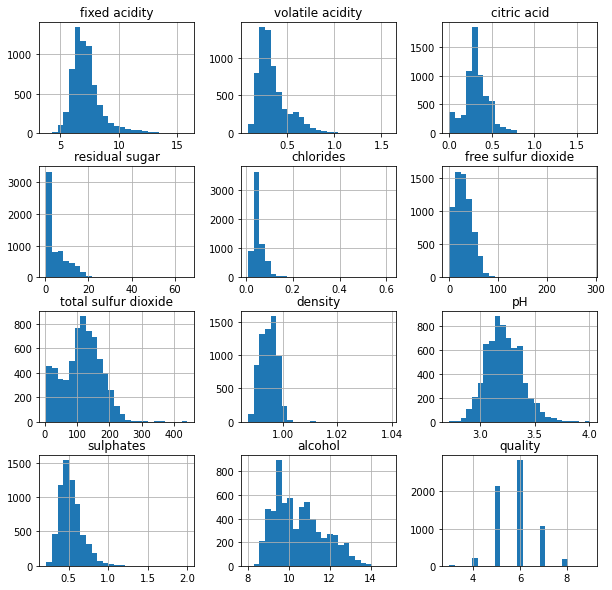

In [3]:
df.hist(bins=25, figsize=(10, 10))
plt.show()

In [4]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

Text(0, 0.5, 'alcohol')

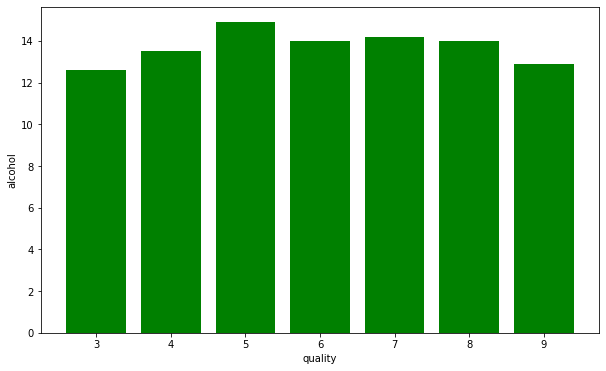

In [5]:
plt.figure(figsize=[10,6], facecolor = 'white')
plt.bar(df['quality'], df['alcohol'], color='green')
plt.xlabel('quality')
plt.ylabel('alcohol')

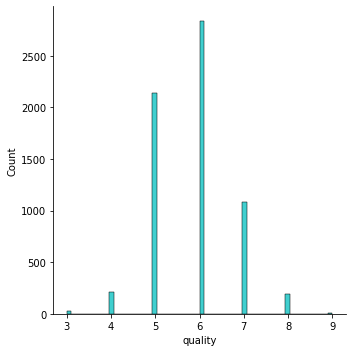

In [6]:
sb.displot(x = df['quality'], kde = False, color = 'c')

<AxesSubplot:>

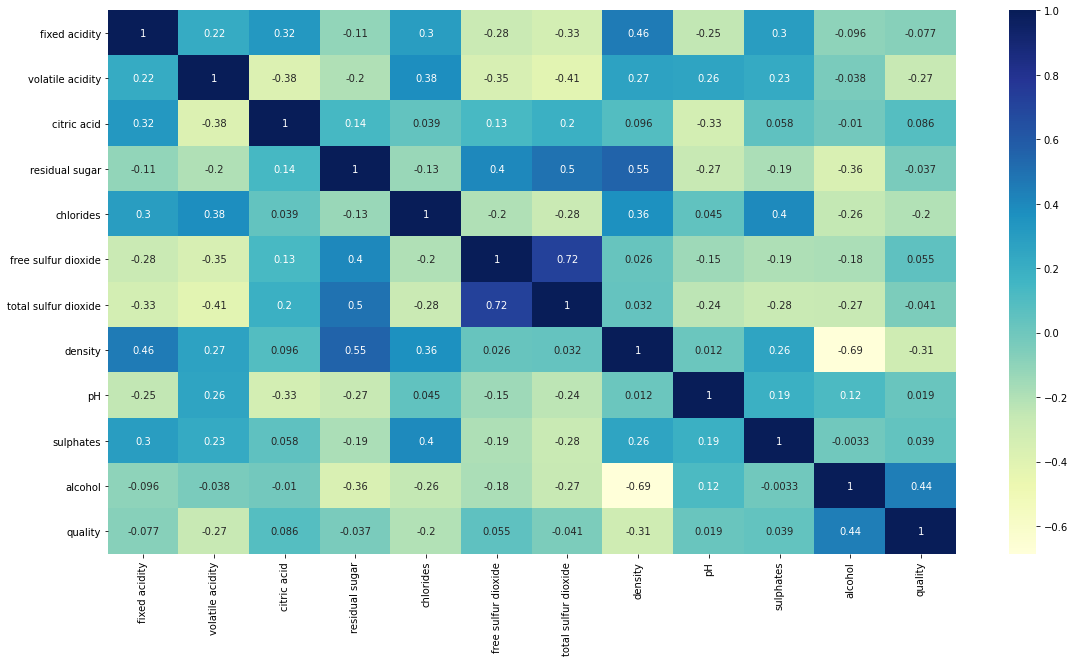

In [7]:
#Correlation visualization

plt.figure(figsize=[19,10], facecolor = 'white')
sb.heatmap(df.corr(), annot=True,cmap="YlGnBu")

In [8]:
feature_name = []
for i in range(len(df.corr().columns)):
    for j in range(i):
        if abs(df.corr().iloc[i,j])>0.7:
            feature_name = df.corr().columns[i]
            print(feature_name)
            


total sulfur dioxide


In [9]:
new_df = df.drop('total sulfur dioxide', axis=1)

In [10]:
new_df.isnull().sum()

type                    0
fixed acidity          10
volatile acidity        8
citric acid             3
residual sugar          2
chlorides               2
free sulfur dioxide     0
density                 0
pH                      9
sulphates               4
alcohol                 0
quality                 0
dtype: int64

In [11]:
new_df.update(new_df.fillna(new_df.mean()))

In [12]:
# For handling categorical variables
cat = new_df.select_dtypes(include='O')

cat_df = pd.get_dummies(new_df, drop_first=True)
cat_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.270,0.36,20.7,0.045,45.0,1.00100,3.00,0.450000,8.8,6,1
1,6.3,0.300,0.34,1.6,0.049,14.0,0.99400,3.30,0.490000,9.5,6,1
2,8.1,0.280,0.40,6.9,0.050,30.0,0.99510,3.26,0.440000,10.1,6,1
3,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.400000,9.9,6,1
4,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.400000,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.580000,10.5,5,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.531215,11.2,6,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.750000,11.0,6,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.710000,10.2,5,0


In [13]:
# Values greater than 0.7 will consider as 1 and below 0.7 will consider as 0
cat_df['best quality'] = [1 if x>=7 else 0 for x in df.quality]
cat_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white,best quality
0,7.0,0.270,0.36,20.7,0.045,45.0,1.00100,3.00,0.450000,8.8,6,1,0
1,6.3,0.300,0.34,1.6,0.049,14.0,0.99400,3.30,0.490000,9.5,6,1,0
2,8.1,0.280,0.40,6.9,0.050,30.0,0.99510,3.26,0.440000,10.1,6,1,0
3,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.400000,9.9,6,1,0
4,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.400000,9.9,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.580000,10.5,5,0,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.531215,11.2,6,0,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.750000,11.0,6,0,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.710000,10.2,5,0,0


In [14]:
# Splitting dataset into train and test

from sklearn.model_selection import train_test_split
x = cat_df.drop(['quality','best quality'],axis=1)
y = cat_df['best quality']
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=40)


In [15]:
# Normalization of numerical variables

from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
norm_fit = norm.fit(x_train)
new_x_train = norm_fit.transform(x_train)
new_x_test = norm_fit.transform(x_test)


In [16]:
new_x_train

array([[0.34710744, 0.1       , 0.22289157, ..., 0.14044944, 0.26086957,
        1.        ],
       [0.20661157, 0.18      , 0.15662651, ..., 0.15168539, 0.11594203,
        1.        ],
       [0.24793388, 0.06666667, 0.18072289, ..., 0.16853933, 0.14492754,
        1.        ],
       ...,
       [0.33884298, 0.38666667, 0.        , ..., 0.20224719, 0.2173913 ,
        0.        ],
       [0.24793388, 0.34      , 0.06024096, ..., 0.25280899, 0.24637681,
        0.        ],
       [0.19008264, 0.16666667, 0.19277108, ..., 0.24157303, 0.2173913 ,
        1.        ]])

In [17]:
new_x_test

array([[0.27272727, 0.20666667, 0.21084337, ..., 0.03932584, 0.52173913,
        1.        ],
       [0.36363636, 0.24      , 0.14457831, ..., 0.1741573 , 0.31884058,
        0.        ],
       [0.17355372, 0.07333333, 0.12650602, ..., 0.12359551, 0.2173913 ,
        1.        ],
       ...,
       [0.29752066, 0.09333333, 0.1626506 , ..., 0.12359551, 0.27536232,
        1.        ],
       [0.27272727, 0.38      , 0.10843373, ..., 0.21348315, 0.15942029,
        0.        ],
       [0.24793388, 0.1       , 0.1746988 , ..., 0.16853933, 0.26086957,
        1.        ]])

In [18]:
# Applying Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import classification_report
random = RandomForestClassifier()
random_fit = random.fit(new_x_train, y_train)
random_score = random.score(new_x_test, y_test)
log = pd.DataFrame(columns=["model", "accuracy"])
log = log.append({"model": "Random Forest", "accuracy": random_score}, ignore_index=True)
# random_score
log

,model,accuracy
0,Random Forest,0.87


In [19]:
x_predict = list(random.predict(new_x_test))
df = {'predicted':x_predict,'original':y_test}
pd.DataFrame(df).head(20)


,predicted,original
369,0,0
6243,0,0
3374,0,0
1009,0,0
220,0,0
4019,0,0
871,0,0
3710,0,0
3781,1,0
1248,0,1


In [20]:
print(classification_report(x_predict, y_test))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1130
           1       0.50      0.80      0.62       170

    accuracy                           0.87      1300
   macro avg       0.73      0.84      0.77      1300
weighted avg       0.91      0.87      0.88      1300



In [21]:
from sklearn.metrics import accuracy_score
random_forest_accuracy = accuracy_score(y_test,x_predict)
random_forest_accuracy

0.87

In [22]:
# Support Vector Classifier

from sklearn.svm import SVC
model2 = SVC()
model2.fit(new_x_train,y_train)
y_pred = model2.predict(new_x_test)
svc_accuracy = accuracy_score(y_test, y_pred)
svc_accuracy
log = log.append({"model": "Support Vector", "accuracy": svc_accuracy}, ignore_index=True)
log

,model,accuracy
0,Random Forest,0.870000
1,Support Vector,0.807692


In [23]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model3.fit(new_x_train,y_train)
y_pred3 = model3.predict(new_x_test)
dt_accuracy = accuracy_score(y_test, y_pred3)
dt_accuracy
log = log.append({"model": "Decision Tree", "accuracy": dt_accuracy}, ignore_index=True)
log

,model,accuracy
0,Random Forest,0.870000
1,Support Vector,0.807692
2,Decision Tree,0.826154


In [24]:
# SGD Classifier

from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(penalty=None)
sgd.fit(new_x_train, y_train)
y_pred4 = sgd.predict(new_x_test)
sgd_accuracy = accuracy_score(y_test, y_pred4)
sgd_accuracy
log = log.append({"model": "SGD ", "accuracy": sgd_accuracy}, ignore_index=True)
log

,model,accuracy
0,Random Forest,0.870000
1,Support Vector,0.807692
2,Decision Tree,0.826154
3,SGD,0.791538


In [25]:
# K-NN Classifier

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(new_x_train, y_train)
y_pred5 = knn.predict(new_x_test)
knn_accuracy = accuracy_score(y_test, y_pred5)
knn_accuracy
log = log.append({"model": "K-Nearest ", "accuracy": knn_accuracy}, ignore_index=True)
log

,model,accuracy
0,Random Forest,0.870000
1,Support Vector,0.807692
2,Decision Tree,0.826154
3,SGD,0.791538
4,K-Nearest,0.828462


In [26]:
# Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0).fit(new_x_train, y_train)
y_pred6 = gb.predict(new_x_test)
gb_accuracy = accuracy_score(y_test, y_pred6)
gb_accuracy
log = log.append({"model": "Gradient Boosting ", "accuracy": gb_accuracy}, ignore_index=True)
log

,model,accuracy
0,Random Forest,0.870000
1,Support Vector,0.807692
2,Decision Tree,0.826154
3,SGD,0.791538
4,K-Nearest,0.828462
5,Gradient Boosting,0.802308


In [27]:
# Adaboost Classifier

from sklearn.ensemble import AdaBoostClassifier
ada_boost = AdaBoostClassifier(n_estimators=100, random_state=0)
ada_boost.fit(new_x_train, y_train)
y_pred7 = ada_boost.predict(new_x_test)
ada_boost_accuracy = accuracy_score(y_test, y_pred7)
ada_boost_accuracy
log = log.append({"model": "Adaboost  ", "accuracy": ada_boost_accuracy}, ignore_index=True)
log

,model,accuracy
0,Random Forest,0.870000
1,Support Vector,0.807692
2,Decision Tree,0.826154
3,SGD,0.791538
4,K-Nearest,0.828462
5,Gradient Boosting,0.802308
6,Adaboost,0.799231


In [28]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(new_x_train, y_train)
y_pred8 = lr.predict(new_x_test)
lr_accuracy = accuracy_score(y_test, y_pred8)
lr_accuracy
log = log.append({"model": "Logistic Regression  ", "accuracy": lr_accuracy}, ignore_index=True)
log

,model,accuracy
0,Random Forest,0.870000
1,Support Vector,0.807692
2,Decision Tree,0.826154
3,SGD,0.791538
4,K-Nearest,0.828462
5,Gradient Boosting,0.802308
6,Adaboost,0.799231
7,Logistic Regression,0.810769


In [29]:
#Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(new_x_train, y_train)
y_pred9 = gnb.predict(new_x_test)
gnb_accuracy = accuracy_score(y_test, y_pred9)
# gnb_accuracy
log = log.append({"model": "GaussianNB", "accuracy": gnb_accuracy}, ignore_index=True)
log

,model,accuracy
0,Random Forest,0.870000
1,Support Vector,0.807692
2,Decision Tree,0.826154
3,SGD,0.791538
4,K-Nearest,0.828462
5,Gradient Boosting,0.802308
6,Adaboost,0.799231
7,Logistic Regression,0.810769
8,GaussianNB,0.735385
